# Kiểm tra giữa kì 
- Phan Quốc Lưu - 20133065

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data into a pandas DataFrame
# data = pd.read_csv('D:\\Nam_3_ki_2\\tuong tac du lieu\\KT giua ki\\Property Sales of Melbourne City.csv')
# data = pd.read_csv('https://cloud.vinhthanh.net/s/3MpCNPWDiH7reec', low_memory=False)
url = 'https://cloud.vinhthanh.net/s/3MpCNPWDiH7reec/download/Property%20Sales%20of%20Melbourne%20City.csv'
data = pd.read_csv(url)

price = data['Price'].values
print (price)

[1480000 1035000 1465000 ... 1100000 1285000 1050000]


In [3]:
# tinh gia tri trung binh
avg = np.mean(price)
print(avg)
# # Moment trung tâm thứ 3: Third central Moment
Moment = np.mean((price - avg) ** 3)
print(Moment)

# Độ xiên: Skewness
skewness = data['Price'].skew()
print(skewness)


1056697.4609154165
6.259122848378565e+17
2.366672689355586


# Bài 2

In [4]:
loccau4 = data[(data['Method'] == 'S') & 
                     (data['Lattitude'].notna()) & 
                     (data['Longtitude'].notna()) & 
                     (data['Landsize'] > 450)]

# Print the filtered data
print(loccau4.head)

<bound method NDFrame.head of        Unnamed: 0          Suburb              Address  Rooms Type    Price  \
30             41      Abbotsford  138/56 Nicholson St      3    u  1090000   
64             79    Airport West       54 Marshall Rd      3    h   720000   
65             80    Airport West        36 Roberts Rd      4    h   785000   
85            100    Airport West         180 Parer Rd      3    h   830000   
88            103    Airport West         174 Parer Rd      2    h   675000   
...           ...             ...                  ...    ...  ...      ...   
18378       23523  Wantirna South         12 Armagh Cr      4    h  1323000   
18379       23524  Wantirna South        34 Fewster Dr      3    h   970000   
18380       23525  Wantirna South           15 Mara Cl      4    h  1330000   
18384       23532        Werribee          5 Nuragi Ct      4    h   635000   
18388       23537   Wheelers Hill         12 Strada Cr      4    h  1245000   

      Method        S

# Bài 3 


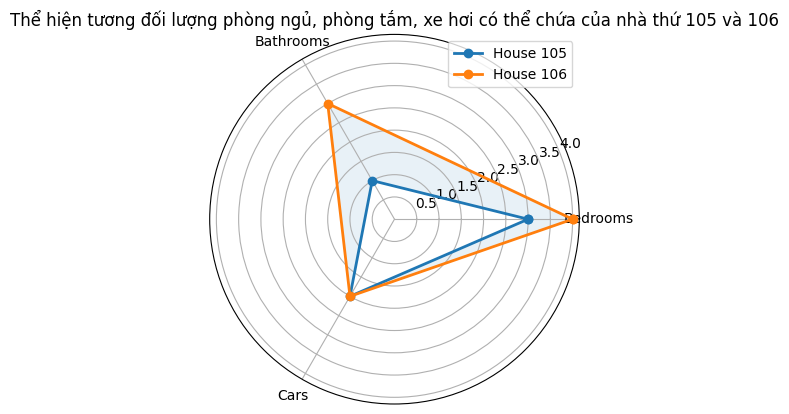

In [5]:

# loc ra nhung ngoi nha
houses = data.iloc[[104, 105]]

# tim so luong bedrooms, bathrooms, and cars trong ngoi nha

bedrooms = houses['Bedroom2'].tolist()
bathrooms = houses['Bathroom'].tolist()
cars = houses['Car'].tolist()

# xac dinh doi tuong can ve
categories = ['Bedrooms', 'Bathrooms', 'Cars']

# ngoi nha thu 105
ngoinha105 = np.array([bedrooms[0], bathrooms[0], cars[0]])

# ngoi nha 106
ngoinha106 = np.array([bedrooms[1], bathrooms[1], cars[1]])

# tao so tư cac vong
fig, ax = plt.subplots(1, 1, subplot_kw=dict(polar=True))
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# ve ngoi nha thu 105
ax.plot(angles, np.concatenate((ngoinha105, [ngoinha105[0]])), 'o-', linewidth=2, label='House 105')
# ve ngoi nha thu 106
ax.plot(angles, np.concatenate((ngoinha106, [ngoinha106[0]])), 'o-', linewidth=2, label='House 106')

ax.fill_between(angles, np.concatenate((ngoinha105, [ngoinha105[0]])), np.concatenate((ngoinha106, [ngoinha106[0]])), alpha=0.1)

ax.set_thetagrids(angles[:-1] * 180/np.pi, categories)
ax.set_title('Thể hiện tương đối lượng phòng ngủ, phòng tắm, xe hơi có thể chứa của nhà thứ 105 và 106')
ax.legend()

plt.show()


# Bài 4 


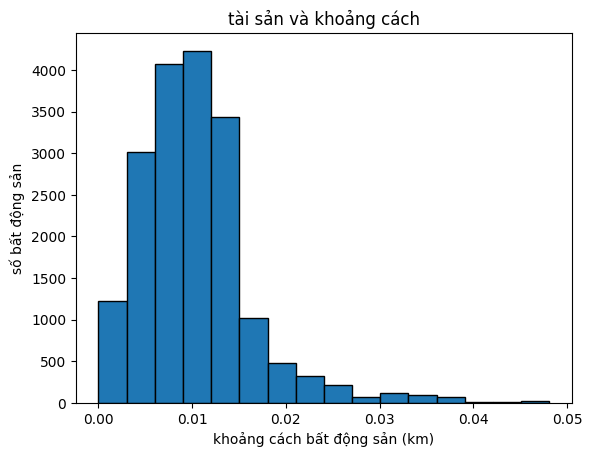

In [6]:
# Lấy khoảng cách từ mỗi bất động sản đến CBD (ở đây chúng ta lấy đơn vị là km, do đó chia cho 1000)
distances = data['Distance'] / 1000

#Tính số lượng bin = ceil(log2(n) + 1), trong đó n là số lượng dữ liệu 
num_bins = int(np.ceil(np.log2(len(distances)) + 1))

# tính khoang cashc min và max 
data_min = distances.min()
data_max = distances.max()
data_range = data_max - data_min

# tạo và vẽ biểu đồ
plt.hist(distances, bins=num_bins, range=(data_min, data_max), edgecolor='black')

#
plt.xlabel('khoảng cách bất động sản (km)')
plt.ylabel('số bất động sản')
plt.title('tài sản và khoảng cách')

# Show the histogram
plt.show()

# Bài 5


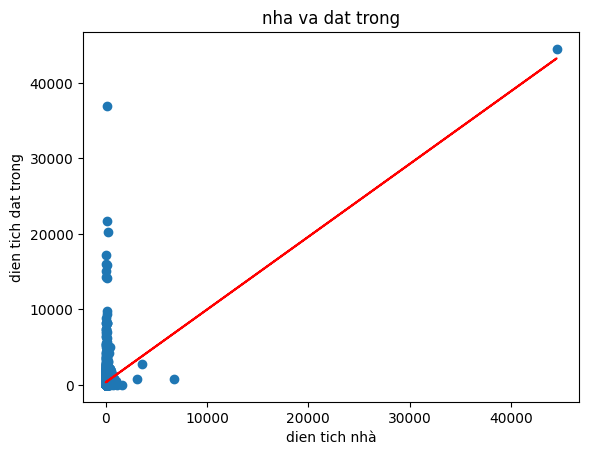

Beta:  0.9636450275752199
he so chan:  343.9288388528961


In [7]:

x = data['BuildingArea']
y = data['Landsize']

# Lấy hai cột Landsize và Price của dữ liệu và loại bỏ các hàng có giá trị rỗng bằng dropna().
valid_indices = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
x = x[valid_indices]
y = y[valid_indices]

# Vẽ biểu đồ phân tán với trục x là Landsize, trục y là Price sử dụng plt.scatter(). Đồng thời vẽ đường xu hướng đã tính toán ở bước trước bằng cách sử dụng plt.plot().
beta, intercept = np.polyfit(x, y, 1)

plt.scatter(x, y)

plt.plot(x, beta*x + intercept, color='red')

# ghi ten bieu do 
plt.xlabel('dien tich nhà')
plt.ylabel('dien tich dat trong')
plt.title('nha va dat trong')

plt.show()
# ve ra bieu do 
print("Beta: ", beta)
print("he so chan: ", intercept)